In [2]:
#importing necessary libraries for plotting,scaling and classification 
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install xgboost
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error

In [6]:
#loading the dataset
df=pd.read_csv('winequalitydata.csv')

In [7]:
#get the first 5 rows to get an idea of the entire dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# we will check for null values in each category and remove the null values
df.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# we don't have any null values

In [11]:
# visualizing data using distplots for various categories

C:\Users\AJAY SAMUEL VICTOR\New folder\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY SAMUEL VICTOR\New folder\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY SAMUEL VICTOR\New folder\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

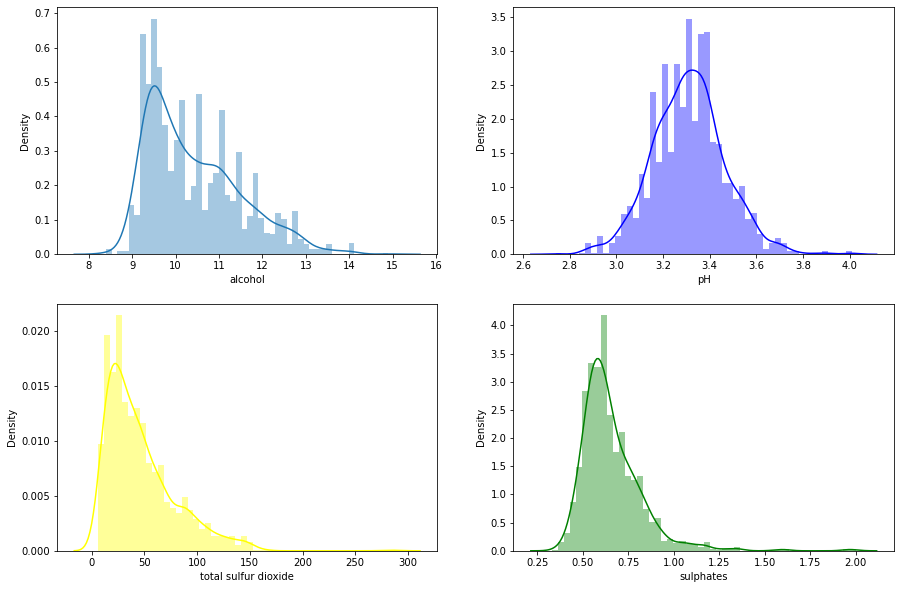

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['alcohol'],bins=50)
plt.subplot(2,2,2)
sns.distplot(df['pH'],bins=50,color='blue')
plt.subplot(2,2,3)
sns.distplot(df['total sulfur dioxide'],bins=50,color='yellow')
plt.subplot(2,2,4)
sns.distplot(df['sulphates'],bins=50,color='green')

C:\Users\AJAY SAMUEL VICTOR\New folder\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY SAMUEL VICTOR\New folder\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY SAMUEL VICTOR\New folder\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

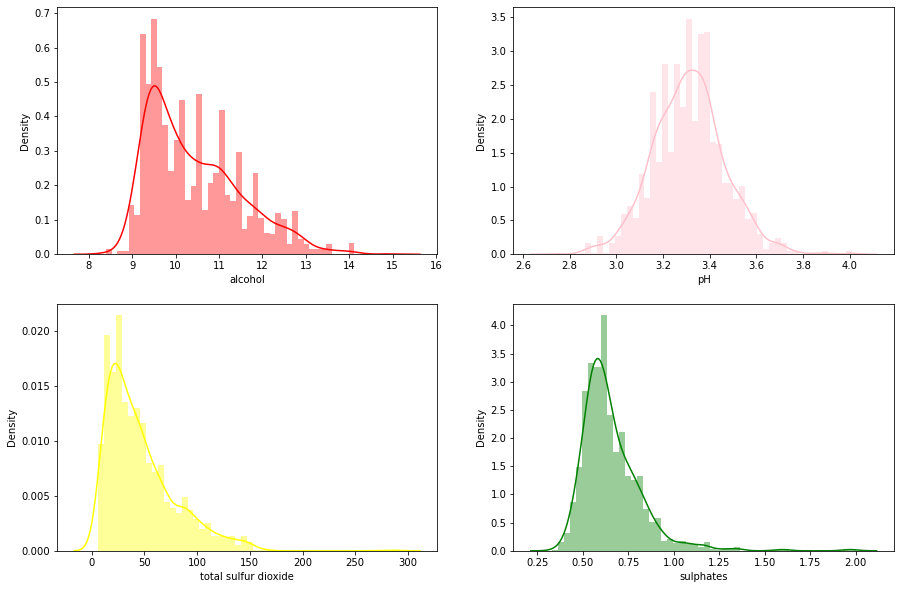

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['alcohol'],bins=50,color='red')
plt.subplot(2,2,2)
sns.distplot(df['pH'],bins=50,color='pink')
plt.subplot(2,2,3)
sns.distplot(df['total sulfur dioxide'],bins=50,color='yellow')
plt.subplot(2,2,4)
sns.distplot(df['sulphates'],bins=50,color='green')

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

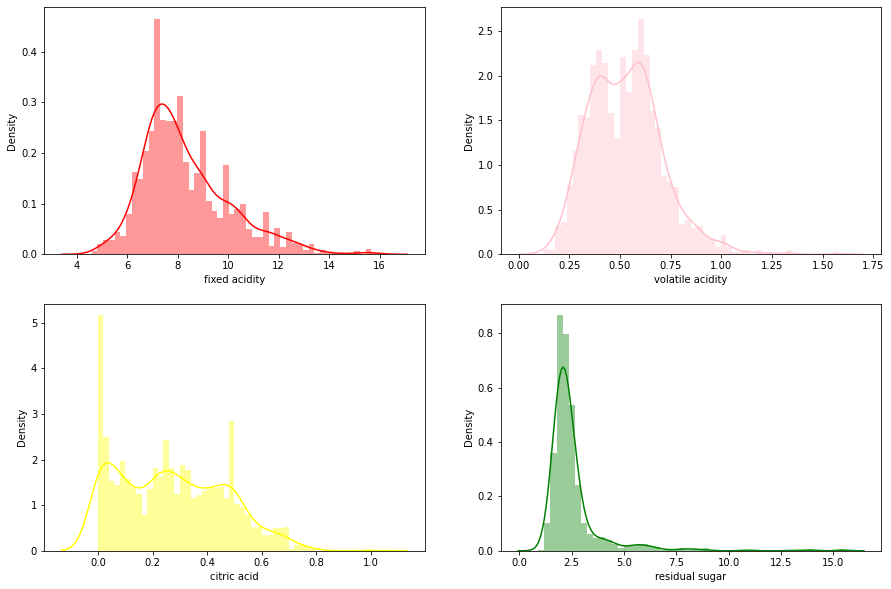

In [19]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['fixed acidity'],bins=50,color='red')
plt.subplot(2,2,2)
sns.distplot(df['volatile acidity'],bins=50,color='pink')
plt.subplot(2,2,3)
sns.distplot(df['citric acid'],bins=50,color='yellow')
plt.subplot(2,2,4)
sns.distplot(df['residual sugar'],bins=50,color='green')

<AxesSubplot:xlabel='density', ylabel='Density'>

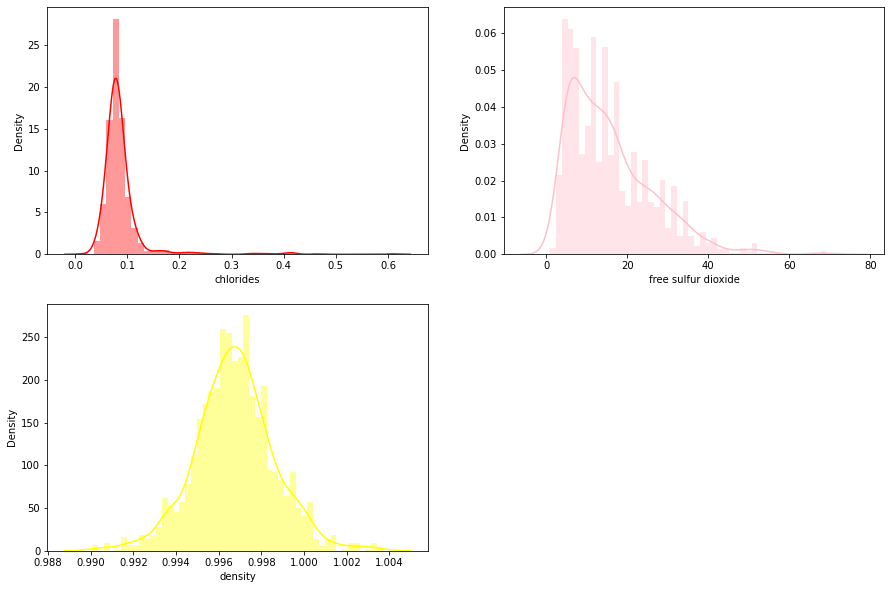

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['chlorides'],bins=50,color='red')
plt.subplot(2,2,2)
sns.distplot(df['free sulfur dioxide'],bins=50,color='pink')
plt.subplot(2,2,3)
sns.distplot(df['density'],bins=50,color='yellow')

In [21]:
# we will now use heatmap to view relation between different features.

<AxesSubplot:>

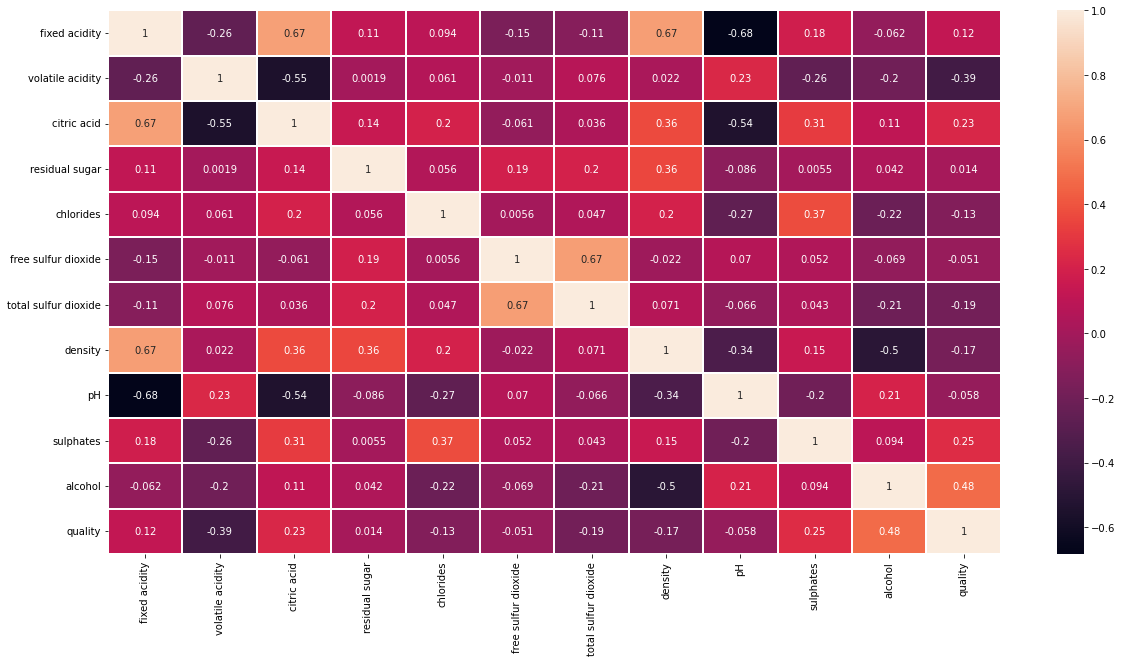

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.4)

In [25]:
# negative values indicates that there is no correlation between the variables compared

<AxesSubplot:xlabel='quality', ylabel='density'>

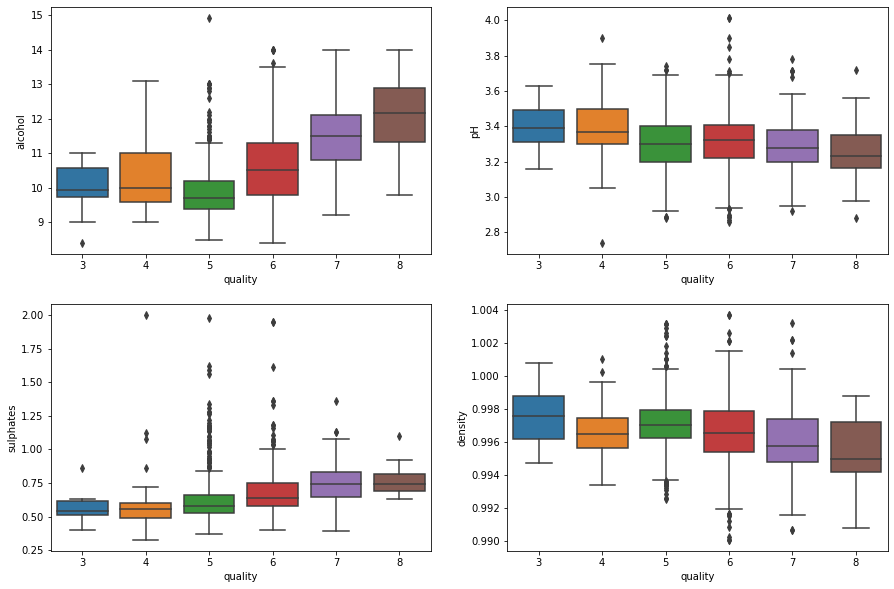

In [29]:
# we will use boxplot to visualize for which values of various features the quality is the highest
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['quality'],df['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(df['quality'],df['pH'])
plt.subplot(2,2,3)
sns.boxplot(df['quality'],df['sulphates'])
plt.subplot(2,2,4)
sns.boxplot(df['quality'],df['density'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

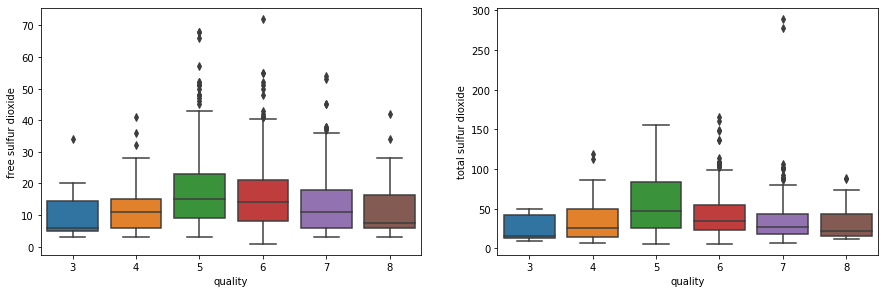

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['quality'],df['free sulfur dioxide'])
plt.subplot(2,2,2)
sns.boxplot(df['quality'],df['total sulfur dioxide'])

In [32]:
#minimum & maximum value of quality
df['quality'].min()

3

In [33]:
df['quality'].max()

8

In [34]:
values = (2, 6, 9)
q = ['BAD', 'GOOD']
df['quality'] = pd.cut(df['quality'], bins = values, labels = q)

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,BAD
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,BAD
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,BAD
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,BAD
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,BAD


In [36]:
# now we have good quality and bad quality to classify data better

In [37]:
df['quality'].value_counts()

BAD     1382
GOOD     217
Name: quality, dtype: int64

In [38]:
# label encoding for the model to train
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

In [41]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [42]:
# dividing data set into train data and test data
# train data - 70%
# test data - 30%
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)


In [43]:
# scaling the data 
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [44]:
# using Random Forest Model
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(accuracy_score(ytest,ypred))

0.88125


In [45]:
# we will print the classification report to check the quality of our prediction
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       413
           1       0.61      0.40      0.49        67

    accuracy                           0.88       480
   macro avg       0.76      0.68      0.71       480
weighted avg       0.87      0.88      0.87       480

